# Framework validation
<strong>Framework and Groups</strong><br>
The Framework has two versions (old and new). <br>
The control rated the old framework.  <br>
The experiment group rated the new framework. <br>

<strong>Metric</strong><br>
The data provided contains the framework rating of the old website and the new website. This rating will be used as the metric for the evaluation.

<strong>Objective</strong><br>
The objective is to check if the new framework should be adopted. <br>

<strong>Hypothesis</strong><br>
H0: nr_choosing_b - nr_choosing_a <= 0 <br>
H1: nr_choosing_b - nr_choosing_a > 0    

<strong>Steps that need to happen: </strong>
    
1. We computed the <strong>observed difference</strong> between the metric, click through rate, for the control and experiment group.
2. We <strong>simulated the sampling distribution</strong> for the difference in proportions (or difference in click through rates). This is done by making use of bootstrapping.
3. We used this sampling distribution to <strong>simulate the distribution under the null hypothesis</strong>, by creating a random normal distribution centered at 0 with the same spread and size.
4. We <strong>computed the p-value</strong> by finding the proportion of values in the null distribution that were greater than our observed difference.
5. We used this p-value to <strong>determine the statistical significance </strong>of our observed difference.




## 0. First explore data

In [11]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

df = pd.read_csv('book2.csv', sep=';')
df.head()

,id,group,rating
0,1,control,1
1,2,control,1
2,3,control,1
3,4,control,1
4,5,control,1


In [12]:
df.describe()

,id,rating
count,49.00000,49.000000
mean,25.00000,1.551020
std,14.28869,0.502545
min,1.00000,1.000000
25%,13.00000,1.000000
50%,25.00000,2.000000
75%,37.00000,2.000000
max,49.00000,2.000000


## 1. Computed the observed difference
### 1.1 Compute the CTR for each group

In [13]:
nr_a = (df['rating'] == 1).sum()
nr_b = (df['rating'] == 2).sum()

print('Number of people choosing A:', nr_a)
print('Number of people choosing B:', nr_b)

Number of people choosing A: 22
Number of people choosing B: 27


In [14]:
obs_diff = nr_b - nr_a
obs_diff

5

## 2. We simulated the sampling distribution.

In [15]:
diffs = []

for _ in range(10000):
    df_sample = df.sample(df.shape[0], replace = True)
    nr_a = (df_sample['rating'] == 1).sum()
    nr_b = (df_sample['rating'] == 2).sum()
    
    temp_obs_diff = nr_b - nr_a 

    diffs.append(temp_obs_diff)

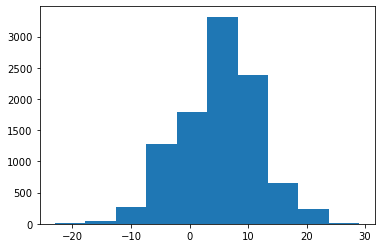

In [16]:
plt.hist(diffs);

## 3. Simulate the distribution under the null hypothesis
now that we have done the bootstrap for the differences in ctr, simulate the H0. 
Do this by taking the bootstrapped differences standard deviation and create a random normal list with that standard deviation that is centered around 0 and with a size the same as the bootstrap size. This creates a normal distibution.

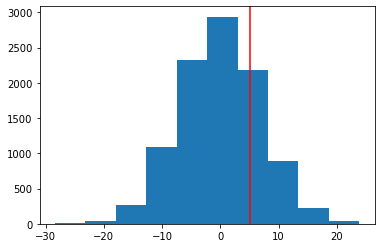

In [17]:
np_diffs = np.array(diffs)
null_vals = np.random.normal(0, np_diffs.std(), np_diffs.size)
plt.hist(null_vals);
plt.axvline(x=obs_diff, color='red');

## 4. Computed the p-value

In [18]:
np.sum(null_vals > obs_diff)

2310

In [19]:
p_value = (null_vals > obs_diff).mean()
p_value

0.231

## 5. determine the statistical significance

In [20]:
if p_value < 0.05:
    print('reject H0')
else:
    print('fail to reject H0')

fail to reject H0


<strong>Therefore the new website should be adopted!</strong>